In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-demand-forecasting-orderscsv/Daily Demand Forecasting Orders.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('/kaggle/input/daily-demand-forecasting-orderscsv/Daily Demand Forecasting Orders.csv')

In [4]:
df.head(2)

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.0,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.0,40419,21399,89461,7679,224.675


In [5]:
df.columns

Index(['Unnamed: 0',
       'Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          60 non-null     int64  
 1   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 2   Day of the week (Monday to Friday)                                  60 non-null     int64  
 3   Non-urgent order                                                    60 non-null     float64
 4   Urgent order                                                        60 non-null     float64
 5   Order type A                                                        60 non-null     float64
 6   Order type B                                                        60 non-null     float64
 7   Order type C       

In [7]:
df.isnull().sum()

Unnamed: 0                                                            0
Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                           

In [8]:
df.describe()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,29.500000,3.016667,4.033333,172.554933,118.920850,52.112217,109.229850,139.531250,77.396133,44504.350000,46640.833333,79401.483333,23114.633333,300.873317
std,17.464249,1.282102,1.401775,69.505788,27.170929,18.829911,50.741388,41.442932,186.502470,12197.905134,45220.736293,40504.420041,13148.039829,89.602041
min,0.000000,1.000000,2.000000,43.651000,77.371000,21.826000,25.125000,74.372000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.412000
25%,14.750000,2.000000,3.000000,125.348000,100.888000,39.456250,74.916250,113.632250,1.243250,34994.250000,20130.000000,50680.500000,12609.750000,238.195500
50%,29.500000,3.000000,4.000000,151.062500,113.114500,47.166500,99.482000,127.990000,7.831500,44312.000000,32527.500000,67181.000000,18011.500000,288.034500
75%,44.250000,4.000000,5.000000,194.606500,132.108250,58.463750,132.171000,160.107500,20.360750,52111.750000,45118.750000,94787.750000,31047.750000,334.237250
max,59.000000,5.000000,6.000000,435.304000,223.270000,118.178000,267.342000,302.448000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.453000


In [9]:
df.corr()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Unnamed: 0,1.000000,0.499218,0.015924,0.042869,-0.086120,0.307525,0.180105,-0.271409,-0.049139,-0.362006,0.306807,0.001856,-0.236477,0.041087
"Week of the month (first week, second, third, fourth or fifth week",0.499218,1.000000,-0.207791,0.243472,0.118258,0.256115,0.312767,-0.041582,0.000964,-0.194088,0.392310,0.147086,-0.157059,0.211709
Day of the week (Monday to Friday),0.015924,-0.207791,1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,-0.132397,-0.339485,-0.051815,-0.577035,-0.012251,-0.435286
Non-urgent order,0.042869,0.243472,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.057150,0.246937,0.732357,0.788192,0.132857,0.934518
Urgent order,-0.086120,0.118258,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.011452,0.242268,0.230618,0.660868,0.031260,0.729785
Order type A,0.307525,0.256115,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,0.064525,-0.151762,0.675328,0.294374,0.230369,0.559735
Order type B,0.180105,0.312767,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,-0.122432,0.127111,0.592845,0.713674,0.067325,0.900673
Order type C,-0.271409,-0.041582,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,0.007906,0.442404,0.330186,0.718739,0.031053,0.804984
Fiscal sector orders,-0.049139,0.000964,-0.132397,-0.057150,-0.011452,0.064525,-0.122432,0.007906,1.000000,0.197670,0.003523,-0.055066,0.294567,-0.052116
Orders from the traffic controller sector,-0.362006,-0.194088,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,0.197670,1.000000,-0.162309,0.240450,0.231614,0.244712


<Axes: >

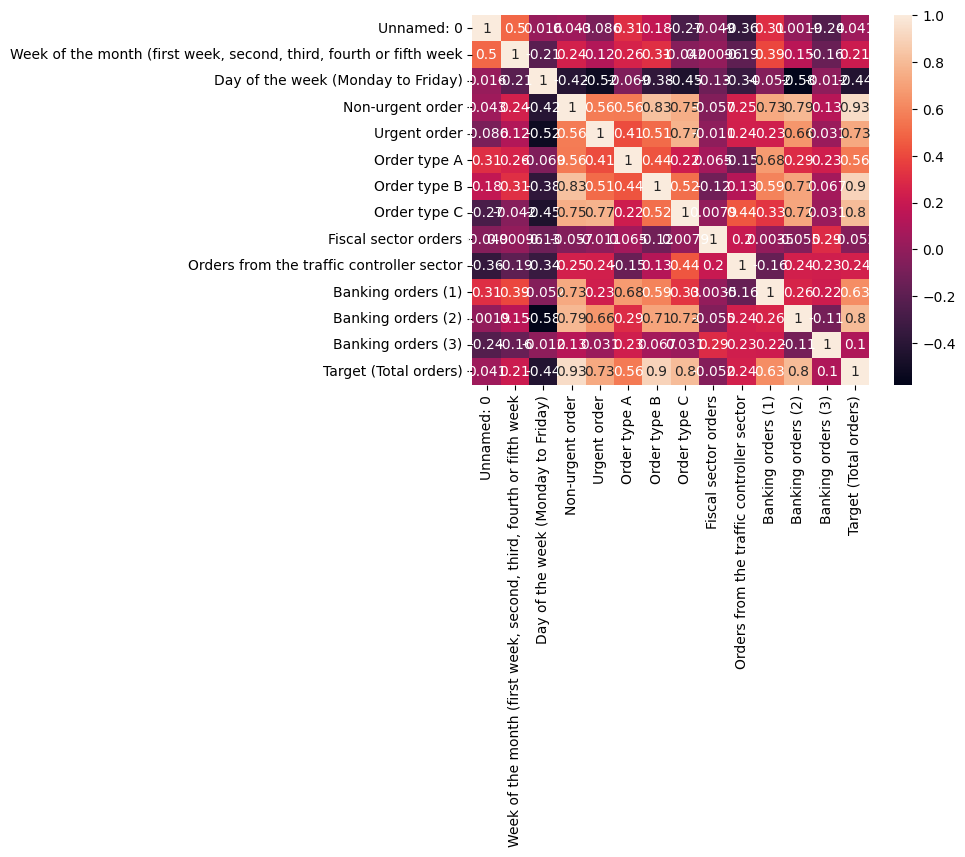

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
y=df['Target (Total orders)']
x=df.drop(columns=['Target (Total orders)','Unnamed: 0'])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeRegressor
d=DecisionTreeRegressor(criterion="squared_error")

In [14]:
d.fit(x_train,y_train)

DecisionTreeRegressor()

In [15]:
d.score(x_test,y_test)

0.7499007496788908

In [16]:
y_pred=d.predict(x_test)

In [17]:
print((y_pred-y_test).abs().mean()*1000) 

34576.44444444444


In [18]:
dt=DecisionTreeRegressor(criterion="absolute_error")

In [19]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error')

In [20]:
dt.score(x_test,y_test)

0.8342464662354536

In [21]:
pred_y=dt.predict(x_test)

In [22]:
print((pred_y-y_test).abs().mean()*1000)

29334.77777777777
